Find normalization that works for features

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import read_quote      as rq
import stock_functions as sf
import df_visualizations as dv
import remap_values as rv

import sys
import time

In [2]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 10)

colorz = [ 'white', 'red', 'blue', 'green', 'orange', 'cyan', 'olivedrab', 'darkred', 'steeleblue', 'seagreen' ]

In [4]:
roll_nums = [3,5,7,10,12,15,18,20,22,25,28,30] # Generate an algorithm for predicting every few days
mom_nums  = [3,5,10,20,30]                     # Momentum has many good tracers
rsi_nums  = [10,15]                            # Good for some long term trends
band_nums = [5,10,15,20,25]                    # A few trace different areas well

In [8]:
# Loop this over inpFiles, plotting distributions and listing statistics

In [67]:
def plotDist( inpList, select_col, xRange=None, yRange=None, scale=False, logit=False,
             diffs=False, moms=False, rsi=False, bands=False, norm=False, n_bins=None ):

    if ( not ( diffs or moms or rsi or bands ) ):
        print 'Set diffs, moms, rsi, or bands to True'
    
    fig, ax = plt.subplots( 4, 2, sharex='col', sharey='row' )
    means = []
    stds  = []
    for i in range( 0, len(inpFileList)):
        fileName = 'quotes/'+inpFileList[i]+'.csv'
        quote = rq.readQuote( fileName )

        #rolls = sf.generate_rolling_close   ( quote, roll_nums )
        selected = None
        if ( diffs ):
            selected = sf.generate_differentials   ( quote            ).drop('diff_v',axis=1)
        if ( moms  ):
            selected = sf.generate_momentum_close  ( quote, mom_nums  )
        if ( rsi   ):
            selected = sf.generate_rsi             ( quote, rsi_nums  )
        if ( bands ):
            selected = sf.generate_bollinger_bands ( quote, band_nums )

        foo = selected
        if ( logit ):
            foo[select_col] = np.log10( foo[select_col] )
        if ( norm ):
            foo[select_col] = rv.smart_scale( selected, column=select_col, show_plot=False )
            
        if ( n_bins==None ):
            ax[i/2,i%2].hist( foo[select_col] )
        else:
            ax[i/2,i%2].hist( foo[select_col], bins=n_bins )
        ax[i/2,i%2].set_title( inpFileList[i] )

        if ( xRange != None ):
            ax[i/2,i%2].set_xlim([ xRange[0] , xRange[1] ])
        if ( yRange != None ):
            ax[i/2,i%2].set_ylim([ yRange[0] , yRange[1] ])
            
        means.append( foo[select_col].mean() )
        stds .append( foo[select_col].std () )

    plt.show()

    print '       ',
    for i in inpFileList:
        print '%7s '%i,
    print '\nMeans: ',
    for i in means:
        print '%7.4f '%i,
    print '\nStdDv: ',
    for i in stds:
        print '%7.4f '%i,
    print ''

In [28]:
inpFileList = ['aapl','ba','farm','hes','ibm','mas','sbux','tgt']

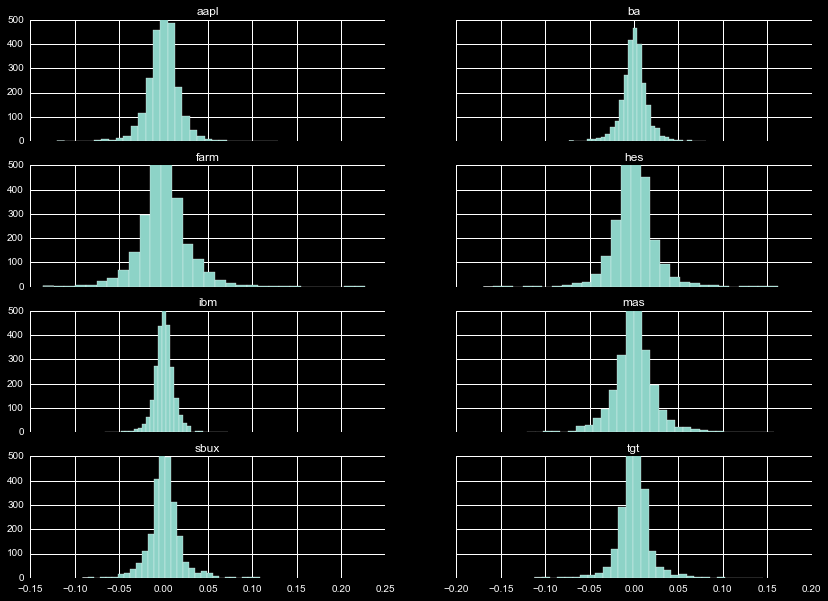

           aapl       ba     farm      hes      ibm      mas     sbux      tgt  
Means:  -0.0001   0.0003   0.0006  -0.0001   0.0009   0.0004   0.0011   0.0002  
StdDv:   0.0172   0.0147   0.0281   0.0236   0.0114   0.0245   0.0178   0.0171  


In [53]:
plotDist( inpFileList, 'diff_co', yRange=[0,700], diffs=True, norm=False, n_bins=30 )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


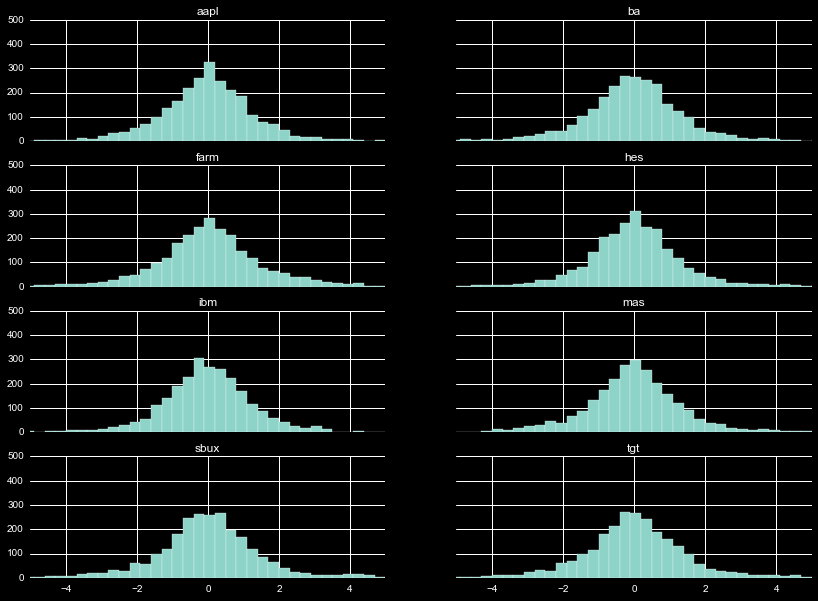

           aapl       ba     farm      hes      ibm      mas     sbux      tgt  
Means:  -0.0386  -0.0141   0.0674   0.0131  -0.0048   0.0080   0.0278   0.0249  
StdDv:   1.4539   1.4854   1.6705   1.4901   1.3923   1.5527   1.6057   1.8525  


In [54]:
plotDist( inpFileList, 'diff_co', xRange=[-5,5], yRange=[0,500], diffs=True, norm=True, n_bins=np.arange(-10,10,0.3) )

In [55]:
# Smart scale for diffs_co

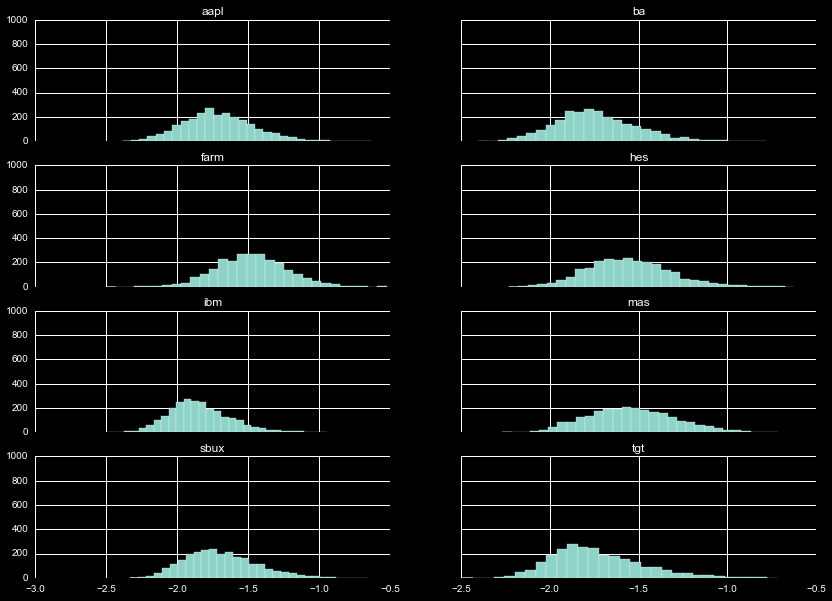

           aapl       ba     farm      hes      ibm      mas     sbux      tgt  
Means:  -1.7058  -1.7368  -1.4725  -1.5528  -1.8361  -1.5426  -1.6939  -1.7355  
StdDv:   0.2475   0.2295   0.2487   0.2349   0.2204   0.2511   0.2471   0.2542  


In [68]:
plotDist( inpFileList, 'diff_hl', yRange=[0,1000], diffs=True, norm=False, logit=True, n_bins=30 )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


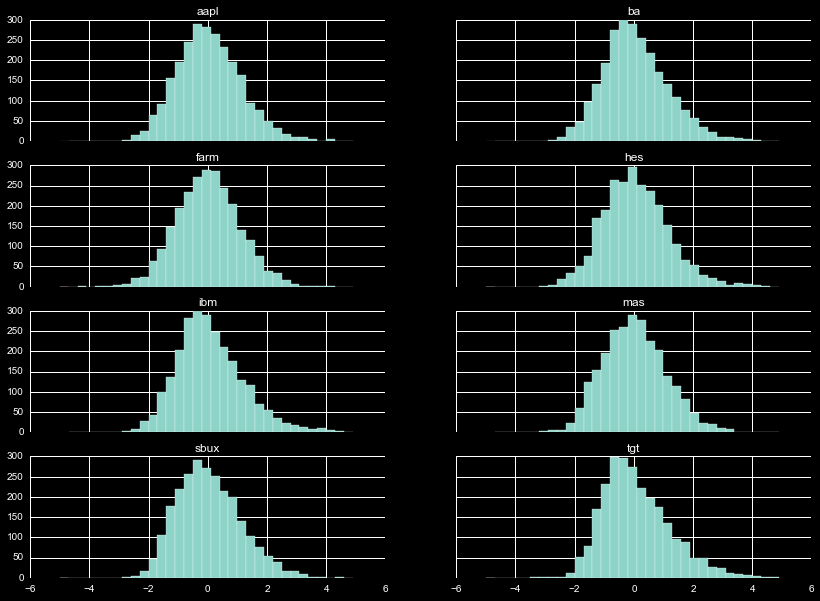

           aapl       ba     farm      hes      ibm      mas     sbux      tgt  
Means:   0.0505   0.0640   0.0141   0.0653   0.0910   0.0280   0.0543   0.0980  
StdDv:   1.0762   1.0954   1.0650   1.1015   1.1356   1.0494   1.0708   1.1432  


In [71]:
plotDist( inpFileList, 'diff_hl', yRange=[0,300], diffs=True, logit=True, norm=True , n_bins=np.arange(-5,5,0.3) )

In [72]:
# Log, then smart scale the diffs_hl